# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
%pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image 
#imgaugP

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-05-26 19:43:54.137459: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-26 19:43:54.148438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748281434.160482   20773 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748281434.163969   20773 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748281434.173571   20773 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd
import sys

In [4]:
from managers.FrameLoader import FrameLoader
from managers.DataRepository import DataRepository
from managers.DataGeneratorSkills import DataGeneratorSkills
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.9509620666503906 gigabytes


In [6]:
repo = DataRepository()
frameloader = FrameLoader(repo)
repo.VideoNames.head()

connection established, loading frame paths
relative paths of framelabels loaded


,folderId,id,name
id,,,
2214,16,2214,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215,16,2215,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084,5,1084,competition/belgium/SR1/2011-brewsterbayside-s...
1085,5,1085,competition/belgium/SR1/2011-brewsterbayside-s...
1086,5,1086,competition/belgium/SR1/2011-brewsterbayside-s...


In [7]:
%%time

train_gen = DataGeneratorSkills(
    frameloader=frameloader,
    train_test_val="train",
    dim=(224,224),
    batch_size=1
)

connection established, loading frame paths
relative paths of framelabels loaded


/home/miked/code/judge/computervision/managers/DataGeneratorSkills.py:134: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)
/home/miked/code/judge/computervision/managers/DataGeneratorSkills.py:134: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)
/home/miked/code/judge/computervision/managers/DataGeneratorSkills.py:134: FutureWarning: The behavior of DataFrame concatenation with e

DataGeneratorSkills init done
CPU times: user 8.58 s, sys: 1.39 s, total: 9.98 s
Wall time: 10.7 s


In [8]:
train_gen.Skills

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
3751,4263,2317,3644,3673,4,1,1,1,2,0,0,0,0,0,0,0,0,2025-04-04 00:00:00
3687,4199,2317,1715,1742,1,1,3,3,3,2,2,0,0,0,0,0,0,2025-04-04 00:00:00
3449,3961,1187,1630,1644,1,1,1,1,1,0,2,0,0,0,0,0,0,2025-04-04 00:00:00
1306,1472,1396,4471,4492,1,0,1,1,1,0,2,0,0,0,0,0,0,2025-02-26 00:00:00
4204,4814,2306,625,651,1,1,7,3,2,0,2,0,0,0,0,0,0,2025-04-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,579,1270,646,661,1,1,1,1,2,0,2,0,0,0,0,0,0,2025-02-09 00:00:00
4467,5156,2282,2987,3009,1,1,1,1,1,0,2,0,0,0,0,0,0,2025-04-11 00:00:00
4279,4889,2306,3443,3469,1,1,1,1,1,0,2,0,0,0,0,0,0,2025-04-11 00:00:00
4875,5657,2289,1621,1647,4,1,9,11,3,2,0,0,0,0,0,0,0,2025-05-21 18:26:37


In [9]:
train_gen.BalancedSkills7

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
0,118,1178,615,637,1,2,1,1,15,0,2,0,0,1,0,0,0,2025-02-09 00:00:00
1,225,2216,1998,2046,6,3,1,1,17,2,2,0,0,1,0,0,0,2025-02-09 00:00:00
2,285,2216,4457,4512,6,1,1,1,23,2,2,0,0,1,0,0,0,2025-02-09 00:00:00
3,386,649,521,559,6,4,1,1,17,2,0,0,0,1,0,0,0,2025-02-09 00:00:00
4,495,1184,821,854,6,1,1,1,23,2,2,0,0,1,0,0,0,2025-02-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,5669,2289,1950,1974,4,1,1,1,2,0,0,0,0,0,0,0,0,2025-05-21 18:30:54
116821,5670,2289,2003,2029,4,1,6,6,3,2,2,0,0,0,0,0,0,2025-05-21 18:31:33
116822,5671,2289,2029,2056,4,1,6,9,3,2,2,1,0,0,0,0,0,2025-05-21 18:32:01
116823,5672,2289,1974,2003,4,1,1,1,1,0,2,0,0,0,0,0,0,2025-05-21 18:32:11


In [10]:
train_gen.BalancedSkills3

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
13938,4857,2306,2050,2078,1,2,2,2,4,2,2,0,0,0,0,0,1,2025-04-11
9001,5075,2298,3573,3591,1,1,1,1,7,2,2,0,0,0,0,0,0,2025-04-11
10705,1864,1277,1101,1121,1,1,1,1,13,2,0,0,0,0,0,0,0,2025-02-26
7035,2150,688,831,849,1,1,3,3,3,2,2,2,0,0,0,0,0,2025-03-02
16862,5107,2282,826,852,1,1,1,1,2,0,0,0,0,0,0,0,0,2025-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,3746,2288,1193,1231,1,1,3,3,8,2,1,0,0,0,0,0,0,2025-04-03
11005,1919,1277,2222,2250,1,1,1,1,20,2,1,0,0,0,0,0,0,2025-02-26
11339,3032,1187,209,234,2,1,1,1,12,0,1,0,0,0,0,0,0,2025-03-10
706,3221,1233,886,900,1,0,1,1,2,0,0,0,0,0,0,0,1,2025-03-11


## Pre balance - balanced comparison

1 mostly means normal (normal jump, normal turning, DD...)

In [11]:
total_accuracy = 0
metrics = 0
def get_df_spec_balance_comparison(col, gen):
    df = pd.concat([
        gen.Skills[col].value_counts(normalize=False), 
        gen.BalancedSkills3[col].value_counts(normalize=False),
        gen.BalancedSkills5[col].value_counts(normalize=False),
        gen.BalancedSkills7[col].value_counts(normalize=False),
        gen.BalancedSkills10[col].value_counts(normalize=False),
        gen.BalancedSkills12[col].value_counts(normalize=False),
        gen.Skills[col].value_counts(normalize=True),
        gen.BalancedSkills3[col].value_counts(normalize=True),
        gen.BalancedSkills5[col].value_counts(normalize=True),
        gen.BalancedSkills7[col].value_counts(normalize=True),
        gen.BalancedSkills10[col].value_counts(normalize=True),
        gen.BalancedSkills12[col].value_counts(normalize=True),
        ], axis=1)
    df.columns = ["normal", "n3", "n5", "n7", "n10", "n12", "percentage", "c3", "c5", "c7", "c10", "c12"]
    return df

In [12]:
col = 'type' # DD, CW, SD, snapperlike, transition
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
type,,,,,,,,,,,,
1,3756,20331,37516,73235,142708,204814,0.761248,0.680855,0.627872,0.626878,0.622049,0.620258
4,628,4866,10505,20699,41003,59376,0.127280,0.162955,0.175813,0.177180,0.178728,0.179814
5,197,1072,2861,5494,11207,16251,0.039927,0.035900,0.047882,0.047028,0.048850,0.049214
6,187,1989,4820,9395,18471,26532,0.037900,0.066609,0.080668,0.080419,0.080513,0.080349
2,103,785,2063,4051,8041,11661,0.020876,0.026288,0.034527,0.034676,0.035050,0.035314
3,63,818,1986,3951,7986,11574,0.012769,0.027394,0.033238,0.033820,0.034810,0.035051


In [13]:
col = 'rotations'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
rotations,,,,,,,,,,,,
1,4004,19628,36646,71760,140625,202979,0.811512,0.657312,0.613312,0.614252,0.612969,0.614700
2,552,6056,12983,25375,49727,71048,0.111877,0.202806,0.217285,0.217205,0.216755,0.215161
0,220,1865,4633,9037,18175,26111,0.044589,0.062456,0.077538,0.077355,0.079223,0.079074
3,90,1243,2898,5629,10933,15755,0.018241,0.041626,0.048501,0.048183,0.047656,0.047712
4,52,800,1888,3666,7235,10393,0.010539,0.026791,0.031598,0.031380,0.031537,0.031474
6,7,106,276,533,1064,1530,0.001419,0.003550,0.004619,0.004562,0.004638,0.004633
5,5,94,243,465,933,1345,0.001013,0.003148,0.004067,0.003980,0.004067,0.004073
8,3,58,152,297,595,861,0.000608,0.001942,0.002544,0.002542,0.002594,0.002607
7,1,11,32,63,129,186,0.000203,0.000368,0.000536,0.000539,0.000562,0.000563


In [14]:
col = 'turner1'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turner1,,,,,,,,,,,,
1,3853,15798,29373,57203,111891,160812,0.780908,0.529051,0.491590,0.489647,0.487721,0.487002
3,516,5165,11254,22063,42908,62027,0.104580,0.172968,0.188348,0.188855,0.187031,0.187842
2,275,3885,7848,15453,30653,43996,0.055736,0.130103,0.131345,0.132275,0.133613,0.133237
6,77,1241,2722,5298,10421,15036,0.015606,0.041559,0.045556,0.045350,0.045424,0.045535
7,75,1251,2765,5409,10796,15561,0.015201,0.041894,0.046275,0.046300,0.047059,0.047125
9,23,426,1003,1990,3976,5732,0.004662,0.014266,0.016786,0.017034,0.017331,0.017359
4,22,321,642,1269,2515,3615,0.004459,0.010750,0.010745,0.010862,0.010963,0.010948
5,16,248,485,960,1888,2705,0.003243,0.008305,0.008117,0.008217,0.008230,0.008192
14,15,212,579,1145,2317,3341,0.003040,0.007100,0.009690,0.009801,0.010100,0.010118


In [15]:
col = 'turner2'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turner2,,,,,,,,,,,,
1,3859,15779,29307,57058,111521,160281,0.782124,0.528415,0.490486,0.488406,0.486108,0.485394
3,509,5096,11066,21667,42108,60916,0.103162,0.170657,0.185202,0.185465,0.183544,0.184478
2,274,3862,7709,15177,30064,43143,0.055533,0.129333,0.129019,0.129912,0.131046,0.130654
6,83,1352,2928,5782,11479,16540,0.016822,0.045276,0.049003,0.049493,0.050036,0.050090
7,59,1014,2227,4356,8661,12502,0.011958,0.033957,0.037271,0.037287,0.037752,0.037861
4,20,272,598,1144,2298,3311,0.004054,0.009109,0.010008,0.009792,0.010017,0.010027
14,16,224,611,1207,2445,3515,0.003243,0.007501,0.010226,0.010332,0.010657,0.010645
10,15,296,696,1379,2745,3952,0.003040,0.009913,0.011648,0.011804,0.011965,0.011968
9,13,247,578,1137,2265,3260,0.002635,0.008272,0.009673,0.009733,0.009873,0.009873


In [16]:
col = 'skill'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
skill,,,,,,,,,,,,
1,2471,4112,10303,20236,41001,59478,0.500811,0.137705,0.172432,0.173216,0.178719,0.180123
3,694,7250,13425,25649,49314,70427,0.140657,0.242792,0.224682,0.219551,0.214954,0.213281
2,650,4269,7349,15156,30818,44107,0.131739,0.142962,0.122994,0.129733,0.134332,0.133573
4,489,6068,9412,18656,35251,51064,0.099108,0.203208,0.157520,0.159692,0.153655,0.154642
7,164,1991,4414,8587,17011,24569,0.033239,0.066676,0.073873,0.073503,0.074149,0.074405
5,103,1217,3089,5949,11436,16419,0.020876,0.040756,0.051698,0.050922,0.049848,0.049723
15,53,777,1820,3596,7254,10429,0.010742,0.026021,0.030460,0.030781,0.031619,0.031583
11,46,480,1083,2035,3951,5638,0.009323,0.016074,0.018125,0.017419,0.017222,0.017074
10,45,565,1146,2166,4211,6066,0.009120,0.018921,0.019180,0.018541,0.018355,0.018370


In [17]:
col = 'hands'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
hands,,,,,,,,,,,,
0,3201,9492,20507,41035,83518,120522,0.648764,0.317873,0.343208,0.351252,0.364046,0.364988
2,1336,15614,30209,57433,108745,156162,0.270774,0.522889,0.505581,0.491616,0.474008,0.472920
1,397,4755,9035,18357,37153,53524,0.080462,0.159238,0.151211,0.157132,0.161946,0.162092


In [18]:
col = 'feet'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
feet,,,,,,,,,,,,
2,3604,15979,35148,68574,134513,193302,0.730442,0.535113,0.588241,0.586981,0.586328,0.585395
1,763,8688,13854,26991,52398,75775,0.154641,0.290948,0.231862,0.231038,0.228397,0.229477
0,567,5194,10749,21260,42505,61131,0.114917,0.173939,0.179897,0.181982,0.185275,0.185129


In [19]:
col = 'bodyRotations'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
bodyRotations,,,,,,,,,,,,
0,4907,29447,58714,114795,225307,324272,0.994528,0.986136,0.982645,0.982624,0.982089,0.982023
1,16,183,498,976,1961,2830,0.003243,0.006128,0.008335,0.008354,0.008548,0.008570
2,11,231,539,1054,2148,3106,0.002229,0.007736,0.009021,0.009022,0.009363,0.009406


In [20]:
col = 'turntable'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turntable,,,,,,,,,,,,
0,4761,27152,53642,104915,205989,296560,0.964937,0.909280,0.897759,0.898053,0.897884,0.898101
1,134,2012,4523,8821,17360,24898,0.027158,0.067379,0.075697,0.075506,0.075670,0.075401
2,39,697,1586,3089,6067,8750,0.007904,0.023341,0.026543,0.026441,0.026445,0.026498


In [21]:
col = 'sloppy'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
sloppy,,,,,,,,,,,,
0,4798,27895,55199,108022,211873,305000,0.972436,0.934162,0.923817,0.924648,0.923532,0.92366
1,136,1966,4552,8803,17543,25208,0.027564,0.065838,0.076183,0.075352,0.076468,0.07634


In [22]:
col = 'backwards'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
backwards,,,,,,,,,,,,
0,4873,28785,56957,111471,218782,314877,0.987637,0.963966,0.953239,0.954171,0.953648,0.953572
1,61,1076,2794,5354,10634,15331,0.012363,0.036034,0.046761,0.045829,0.046352,0.046428


In [23]:
col = 'hard2see'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
hard2see,,,,,,,,,,,,
0,4806,28265,55900,109242,214250,308377,0.974058,0.946552,0.935549,0.935091,0.933893,0.933887
1,128,1596,3851,7583,15166,21831,0.025942,0.053448,0.064451,0.064909,0.066107,0.066113


In [24]:
col = 'fault'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
fault,,,,,,,,,,,,
0,4712,27643,54581,106600,208644,300478,0.955006,0.925723,0.913474,0.912476,0.909457,0.909966
1,222,2218,5170,10225,20772,29730,0.044994,0.074277,0.086526,0.087524,0.090543,0.090034


In [25]:
print(f"minimum train accuracy = {(100*total_accuracy / metrics):.3f}%")

minimum train accuracy = 70.188%


<Axes: >

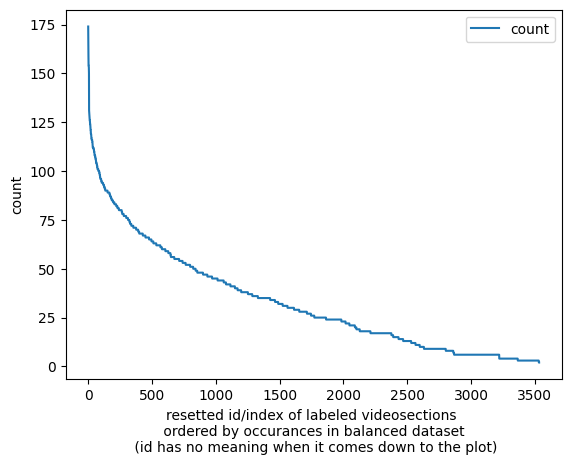

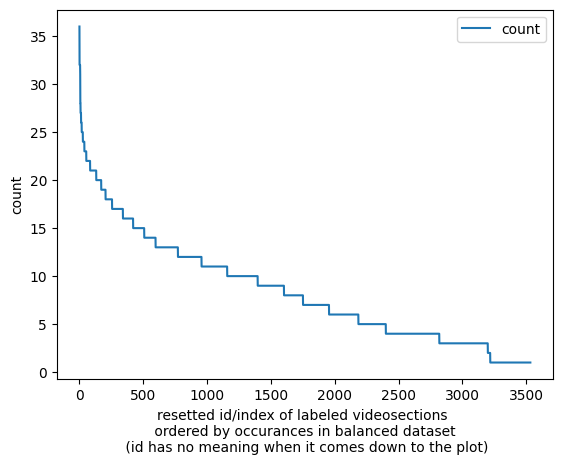

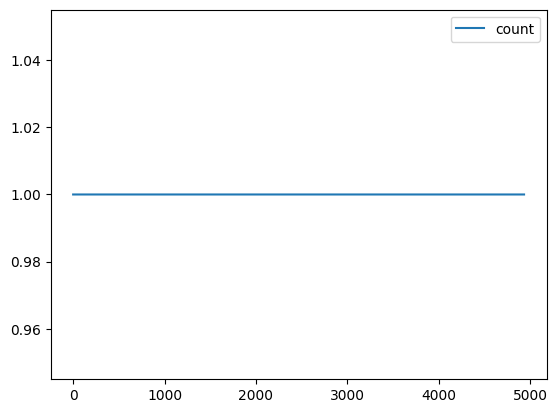

In [26]:
fig = pd.DataFrame(train_gen.BalancedSkills7["id"].value_counts()).reset_index(drop=True).plot(xlabel='resetted id/index of labeled videosections \n ordered by occurances in balanced dataset \n (id has no meaning when it comes down to the plot)', ylabel='count').get_figure()
fig = pd.DataFrame(train_gen.BalancedSkills3["id"].value_counts()).reset_index(drop=True).plot(xlabel='resetted id/index of labeled videosections \n ordered by occurances in balanced dataset \n (id has no meaning when it comes down to the plot)', ylabel='count').get_figure()
pd.DataFrame(train_gen.Skills["id"].value_counts()).reset_index(drop=True).plot()

In [36]:
fig.set_size_inches(10, 7)
fig.savefig('/home/miked/code/judge/paper/bachproef/img/skill-upsampling-distribution.png')
fig.savefig('plots/skill-upsampling-distribution.png')
pd.set_option("display.max_rows", 10)

## Skill balance function

In [28]:
col = 'turner2'
series_normalized_occurances = train_gen.Skills[col].value_counts(normalize=True)
max_occurance_percentage = series_normalized_occurances.iloc[0]

def get_multiplier(occurance_percentage: float, max_occurance_percentage: float, N = 10):
    """Calculate how many times more a skill needs to be added
    Returns a number in the interval [1, N["""
    assert isinstance(occurance_percentage, (int, float))
    assert isinstance(max_occurance_percentage, (int, float))
    assert occurance_percentage > 0 and occurance_percentage <= 1
    assert max_occurance_percentage > 0 and max_occurance_percentage <= 1
    assert max_occurance_percentage >= occurance_percentage, f"got {max_occurance_percentage} and {occurance_percentage}"

    multiplier = N * np.pow(1 - (np.sqrt(occurance_percentage / max_occurance_percentage)), 2)
    multiplier = multiplier if multiplier >= 1 else multiplier + 1
    multiplier_squared = multiplier * multiplier
    return multiplier_squared

for index, value in series_normalized_occurances.items():
    n3 = value * get_multiplier(value, max_occurance_percentage, N=3)
    n5 = value * get_multiplier(value, max_occurance_percentage, N=5)
    n7 = value * get_multiplier(value, max_occurance_percentage, N=7)
    n10 = value * get_multiplier(value, max_occurance_percentage, N=10)
    
    print(f"{index:2d} - {value:.3f} - {n3:.3f} - {n5:.3f} - {n7:.3f} - {n10:.3f}")

 1 - 0.782 - 0.782 - 0.782 - 0.782 - 0.782
 3 - 0.103 - 0.153 - 0.424 - 0.831 - 1.697
 2 - 0.056 - 0.145 - 0.402 - 0.788 - 1.608
 6 - 0.017 - 0.080 - 0.223 - 0.437 - 0.892
 7 - 0.012 - 0.063 - 0.176 - 0.346 - 0.705
 4 - 0.004 - 0.027 - 0.075 - 0.147 - 0.301
14 - 0.003 - 0.022 - 0.062 - 0.122 - 0.248
10 - 0.003 - 0.021 - 0.059 - 0.115 - 0.235
 9 - 0.003 - 0.019 - 0.052 - 0.102 - 0.207
12 - 0.003 - 0.019 - 0.052 - 0.102 - 0.207
 5 - 0.003 - 0.019 - 0.052 - 0.102 - 0.207
11 - 0.002 - 0.017 - 0.048 - 0.095 - 0.193
 8 - 0.002 - 0.015 - 0.041 - 0.081 - 0.164
22 - 0.001 - 0.009 - 0.026 - 0.051 - 0.104
17 - 0.001 - 0.009 - 0.026 - 0.051 - 0.104
18 - 0.001 - 0.009 - 0.026 - 0.051 - 0.104
13 - 0.001 - 0.008 - 0.022 - 0.043 - 0.088
24 - 0.001 - 0.005 - 0.014 - 0.027 - 0.054
20 - 0.001 - 0.005 - 0.014 - 0.027 - 0.054
26 - 0.001 - 0.005 - 0.014 - 0.027 - 0.054
21 - 0.000 - 0.003 - 0.009 - 0.018 - 0.037
16 - 0.000 - 0.003 - 0.009 - 0.018 - 0.037
15 - 0.000 - 0.003 - 0.009 - 0.018 - 0.037


In [29]:
max_occurance_percentage

np.float64(0.7821240372922578)

## Apply

In [30]:
info_columns = [
    'type', 'rotations', 'turner1', 'turner2', 'skill', 'turntable',
    'bodyRotations', 'hands', 'feet', 'sloppy', 'hard2see', 'fault',
    'backwards'
]

In [31]:
N = 7
balanced_skills = pd.DataFrame(columns=train_gen.Skills.columns)
for col in info_columns:
    series_normalized_occurances = train_gen.Skills[col].value_counts(normalize=True)
    max_occurance_percentage = series_normalized_occurances.iloc[0]

    for index, value in series_normalized_occurances.items():
        if value == max_occurance_percentage:
            continue
        rounded_multiplier = int(np.round(get_multiplier(value, max_occurance_percentage, N=7)))
        extra_skills = [train_gen.Skills[train_gen.Skills[col] == index] for _ in range(rounded_multiplier)]
        extra_skills.append(balanced_skills)
        balanced_skills = pd.concat(extra_skills, ignore_index=True)

/tmp/ipykernel_20773/2154607191.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)


In [32]:
len(balanced_skills)

116825

In [33]:
balanced_skills["turntable"].value_counts(normalize=True)

turntable
0    0.898053
1    0.075506
2    0.026441
Name: proportion, dtype: float64